## Carga de bibliotecas

In [1]:
import pytesseract
import numpy as np
import cv2
import re

from PIL import Image
from matplotlib import pyplot as plt

## Carga de funciones

In [2]:
def resize_img(img: np.ndarray, scale: np.int64 = 150):
    width = int(img.shape[1] * scale / 100)
    height = int(img.shape[0] * scale / 100)
    dim = (width, height)
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

## Config Pytesseract

In [3]:
pytesseract.pytesseract.tesseract_cmd = r"C:/Program Files/Tesseract-OCR/tesseract.exe"
tessdata_dir_config = r'--tessdata-dir "C:/tessdata-main"'
# tess_config = r"-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMOPQRSTUVWXYZabcdefghijklmopqrstuvwxyz"

## Procesamiento de la imagen
[👉decoding-captchas](https://mathieularose.com/decoding-captchas)

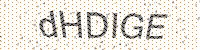

In [4]:
path = r'./img/captcha_5.jpg'
image = Image.open(path).convert("RGB")
image

In [5]:
image_array = np.array(image)
blurred_image = cv2.GaussianBlur(image_array, (0, 0), 1) # Difuminación de la imagen
rgb_image = blurred_image[:, :, ::-1].copy() # Convertimos la imagen a RGB (Rojo, Verde y Azul)
bgr2gray_array = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY) # Convertir la imagen a escala de grises desde el espacio de color RGB
# bitwise_image = cv2.bitwise_not(bgr2gray_array) # Invierte la imagen en blanco y negro
resize_image = resize_img(bgr2gray_array, 500) # Rescalado de la imagen

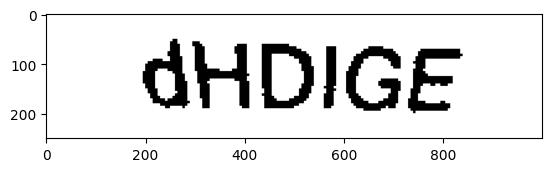

In [6]:
# Aplicar un umbral a una imagen en escala de grises
# Todos los píxeles que están por encima del umbral se establecen en 255, 
# mientras que todos los píxeles que están por debajo del umbral se establecen en 0, 
# creando una imagen binaria donde los objetos de interés están representados por píxeles blancos 
# y el fondo está representado por píxeles negros.
_, thresh = cv2.threshold(resize_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

In [7]:
txt = pytesseract.image_to_string(thresh, config=tessdata_dir_config)
txt = re.sub(r"[^a-zA-Z0-9]", "", txt)
txt

'dHDIGE'